<h1>Содержание<span class="tocSkip"></span></h1>

# Выявление самых популярных и продаваемых игр для интернет-магазина "Стримчик"

Есть данные по играм интернет-магазина "Стримчик" за 2016 год.  <br>
Об играх известна следующая информация: названия игр, платформа, год выпуска, жанр игры, продажи в Северной Америке, продажи в в Европе, продажи в Японии, продажи в других странах, оценки критиков, оценки пользователей, рейтинг в организации ESRB.

### Описание данных

- Name — название игры <br>
- Platform — платформа <br>
- Year_of_Release — год выпуска<br>
- Genre — жанр игры<br>
- NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
- EU_sales — продажи в Европе (миллионы проданных копий)<br>
- JP_sales — продажи в Японии (миллионы проданных копий)<br>
- Other_sales — продажи в других странах (миллионы проданных копий)<br>
- Critic_Score — оценка критиков (максимум 100)<br>
- User_Score — оценка пользователей (максимум 10)<br>
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Цель исследования

Выявить закономерности, которые приводят к успешности (=большей продаваемости) игр.

### Ход исследования

Данные об играх представлены в файле `games.csv`. О качестве данных ничего не известно. К этому файлу есть документация.
<ol>
<li> Обзор данных</li> 
    <li> Подготовка данных: замена типов данных, переименование столбцов, удаление пропусков, подсчёт суммарных продаж игр по всем платформам во всех регионах </li>
    <li> Исследовательский анализ данных: <br>
    - как менялись продажи игр по платформам с годами<br>
    - выбор  платформ с наибольшими суммарными продажами и визуализация продаж по годам<br>
    - выбор платформ с продажами за 2013-2016 годы и анализ объема продаж игр на этих платформах<br>
        - выбор прибыльных платформ и анализ их продаж<br>
        - подсчёт и визуализация корреляции между продажами игр на платформы и отзывами критиков и пользователей<br>
        - нахождение самых продаваемых жанров игр </li>
                <li> Нахождение самых популярных платформ, жанров и игр с рейтингов ESRB для Европы, Японии и Северной Америки</li>
    <li> Проверка гипотез о равенстве средних пользовательских рейтингах платформ Xbox One и PC; о равенстве средних пользовательских рейтингов жанров Action  и Sports 

## Изучение файлов данных

In [1]:
import pandas as pd #import pandas
import seaborn as sns #import seaborn
import matplotlib.pyplot as plt #import matplotlib
from scipy import stats as st #import stats
import numpy as np

from io import BytesIO
import requests

In [2]:
import warnings
warnings.simplefilter("ignore")

Откроем файл данных

In [3]:
def upload_data(link):
    spreadsheet_id = link 
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
    r = requests.get(file_name)
    df = pd.read_csv(BytesIO(r.content))
    return df

In [4]:
games = upload_data('1XWLtM9P2NIEkWF9A2pWbjPUofNtc-E8SGvkF3MTYmAA')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#review data info
def data_info(df):
    print(f'Размер таблицы {df.shape}')
    
    df.info()

    print(f'Количество дубликатов {df.duplicated().sum()}')
    
    display(df.describe())

In [6]:
pd.options.display.float_format = "{:,.2f}".format
data_info(games)

Размер таблицы (16715, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Количество дубликатов 0


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


* Из общей информации видно, что в данных есть пропущенные значения

* В данных нет никаких аномальных и неправдоподобных значений. Всё в норме

* Явных дубликатов нет


В столбцах:
* Name 
* Year_of_Release 
* Genre 
* Critic_Score 
* User_Score 
* Rating <br>


есть пропущенные значения

Проверим наличие неявных дубликатов. Мало ли в данных встречаются опечатки.

In [7]:
#finding unique names in column Platform
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
#finding unique names in column Genre
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

В обоих столбцах нет неявных дубликатов. В столбце `Genre` есть строки с неопределенным жанром. В дальнейшем посмтрим, как это отразится на расчётах и нужно ли с этим что-то будет сделать.

In [9]:
#finding unique names in column Rating
games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

"K-A" ("Kids to Adults") - в прошлом используемое название рейтинга "E" ("Everyone"). По сути то одно и то же, поэтому приведем все игры с рейтингом *K-A* к *E* для дальнейшего упрощения анализа.

### Вывод

* В датафрейме 16715 строк и 11 стролбцов <br>
* В наименованиях столбцов ошибки <br>
* Встречаются пропущенные значения <br>
* Встречаются неявные дубликаты

## Подготовка данных

### Замена названий столбцов

Приведём названия столбцов в датафрейме в соответствие с хорошим стилем

In [10]:
#rename columns
games = games.rename(columns=
                     {'Name' : 'name', 
                      'Platform' : 'platform',
                      'Year_of_Release' : 'year_of_release', 
                      'Genre' : 'genre', 
                      'Other_sales' : 'other_sales',
                      'Critic_Score' : 'critic_score',
                      'User_Score' : 'user_score',
                      'Rating' : 'rating',
                      'NA_sales' : 'na_sales',
                      'EU_sales' : 'eu_sales',
                      'JP_sales' : 'jp_sales'}) 

### Приведение данных к нужным типам

Для начала посмотрим, какие виды пропусков в столбце `year_of_release`

In [11]:
#finding strings with missing values in column 'year_of_release'
games_with_gaps_in_years = games[games['year_of_release'].isna()]
games_with_gaps_in_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [12]:
#finding names of platforms with missed year of release
games_with_gaps_in_years['platform'].unique()

array(['PS2', 'Wii', '2600', 'X360', 'GBA', 'PC', 'PS3', 'PS', 'PSP',
       'XB', 'GB', 'DS', 'GC', '3DS', 'N64', 'PSV'], dtype=object)

In [13]:
#finding names of games with missed year of release
games_with_gaps_in_years['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

Пропуски могут быть связаны с проблемами при выгрузке данных (данные просто потерялись), либо в магазине нет данных о годе выпуска игр (об этом не написано на упаковке, на обложке, в инструкции). <br>
NaN — тип данных float. Это количественное значение. Мы не можем заменить эти данные на 0 или медиану/среднее арифметическое. Тогда бы это сказалось на рейтинге игры, на динамике продаж. <br>
Конечно, существует вариант заменить все пропуски путем поиска даты релиза конкретной игры на конкретную платформу, но это займет слишком много времени. Сейчас пропущенных строк около 300. А что, если их будет 300 000 ? Разве для каждой такой строки рационально гуглить? <br>

Во всех остальных столбцах типы данных float к integer приводить не буду, т.к. в этих столбцах цифры после запятой значимы.

В столбце `user_score` хранятся данные с оценкой пользователей. Тип данных - object. Это всё из-за значений 'tbd'. tbd = To be determined. Это значит, что оценки пользователей на эти игры есть, но их недостаточно для того, чтобы выгрузить эту цифру на платформу с рейтингами. Требуется большее количество оценок. Заменить это знаение на какую-то цифру будет неправильно, потому что мы не знаем, какие есть оценки на эти игры. Заменю эти значения на NaNы, т.к. впоследствии мне понадобятся численные расчёты со значениями этого столбца, а тип данных object мне не подойдёт.

In [14]:
#changing "tbd" to NaN
games.loc[games['user_score'] == "tbd", 'user_score'] = pd.NA
#Convert object to float
games['user_score'] = pd.to_numeric(games['user_score'],errors = 'coerce')

Приведем к единому виду неявные дубликаты в столбце `rating`. 

In [15]:
#replacement wrong values (K-A) on 'E'
games['rating'] = games['rating'].replace('K-A', 'E')

#replacement NA values on "Not defined"
games['rating'] = games['rating'].fillna('ND')

### Замена пропущенных значений

Посмотрим, какие строчки в датафрейме с пропущенными значениями в столбце `name`

In [16]:
#showing missed values in column name
display(games[games['name'].isna()]) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,ND
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,ND


Судя по всему, по этим играм есть даже какие-то продажи. Прибыль эти игры приносили. Поэтому мы не можем просто удалить строчки с этими данными.  Могу предположить, что это какие-то нелегальные игры. Я заменю NaNы на "no_name".<br>
Именно для этих игр жанр не определен. Заменю NaNы в столбце `genre` на "undefined".

In [17]:
#filling missed values in name and genre columns
games['name'] = games['name'].fillna('no_name')
games['genre'] = games['genre'].fillna('undefined')

Значения в столбцах `critic_score`,	`user_score` и	`rating` существенно влияют на рейтинг игр. Мы не можем заменить значения в столбцах `critic_score`,	`user_score` на 0, среднее арифметическое или медианы, потому что это сильно искажает действительный рейтинг игры. Вдруг медиана или среднее арифметическое намного больше или меньше, чем истинный рейтинг. Тогда мы будем работать с заведомо ложной информацией. Оставим пропущенные значения как есть.<br>
Отсутствие данных может быть связано с тем, что эти игры не занесены в платформы с рейтингами (например, такие https://www.metacritic.com/game). Поэтому раз игр нет на этих платформах, некому присваивать им рейтинг. Больше всего пропущенных значений с рейтингами от критиков. Это может быть связано с тем, что эти игры не попадали в поле внимание критиков, это не общеизвестные игры, поэтому критикам незачем было писать о них отзывы. <br>
В столбце `rating` пропущенные значения могут быть связаны с тем, что игра выходила до 1994 года (год основания Entertainment Software Rating Board (ESRB) - организации, которая присваивает рейтинг), либо данные при выгрузке утеряны.



### Расчёт продаж по регионам

Посчитаем суммарные продажи по всем регионам и добавим эти значения в отдельный столбец `total_sales_worldwide`

In [18]:
#counting total sales from all regions
games['total_sales_worldwide']= games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

### Вывод

- На этапе подготовки данных были переименованы названия столбцов (приведены в соответствие с правилами хорошего стиля).<br>
- Были заменены пропуски в тех столбцах, где можно было аргументированно подобрать замену (столбцы `name` , `genre`, `rating`) на фиктивные значения. <br>
- В столбце `user_score` значения 'tbd' были заменены на NaNы.<br> 
- В столбце `rating` были устранены неявные дубликаты (все значения K-A были заменены на E).<br>
- Также на этапе подготовки были посчитаны суммарные продажи игр по всем платформам за все годы и эти значения были вынесены в отдельный столбец `total_sales_worldwide`.

## Анализ данных

Проверим, сколько игр выпускалось в разные годы.

In [19]:
#select unique values from years_of_release column and counting frequency of occurrence
games['year_of_release'].value_counts().sort_values()

1,980.00       9
1,984.00      14
1,985.00      14
1,988.00      15
1,987.00      16
1,990.00      16
1,983.00      17
1,989.00      17
1,986.00      21
1,982.00      36
1,991.00      41
1,992.00      43
1,981.00      46
1,993.00      62
1,994.00     121
1,995.00     219
1,996.00     263
1,997.00     289
1,999.00     338
2,000.00     350
1,998.00     379
2,001.00     482
2,016.00     502
2,013.00     544
2,014.00     581
2,015.00     606
2,012.00     653
2,004.00     762
2,003.00     775
2,002.00     829
2,005.00     939
2,006.00    1006
2,011.00    1136
2,007.00    1197
2,010.00    1255
2,009.00    1426
2,008.00    1427
Name: year_of_release, dtype: int64

Видно, из года в год выпуск игр меняется. В какие-то годы выпуск игр растет, а в какие-то падает. Начиная с 1994 года количество выпускаемых игр измеряется уже не в десятках, а в сотнях; а с 2006 года уже в тысячах.<br>
Для прогнозирования продаж на 2017 год данные за весь период не важны. Важны данные, близкие к 2017 году. Например, за последние 5 лет, с 2012 по 2016.

### Изменения продаж по платформам

Посмотрим, как менялись продажи по платформам с годами.

In [20]:
#making pivot_table with data of game sales on each platform on each year
total_sales_for_each_platform = pd.pivot_table(games,
              index=['platform', 'year_of_release'],
              aggfunc=['sum', 'mean', 'median', 'count'],
              values='total_sales_worldwide')
#rename columns
total_sales_for_each_platform.columns = ['sum_of_sales', 'mean_of_sales', 'median_of_sales', 'count_of_sales']

#update indexes
total_sales_for_each_platform.reset_index(inplace=True)

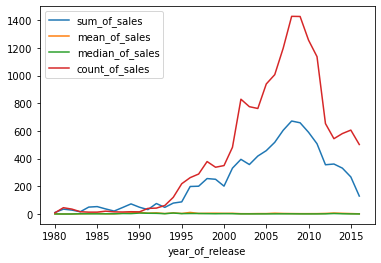

In [21]:
sales_df = total_sales_for_each_platform[[x for x in total_sales_for_each_platform.columns if 'sales' in x] + ['year_of_release']]
sales_df.groupby('year_of_release').sum().plot()
plt.show()

Топ продаж и разработок игр на платформы приходился на 2005- 2010 года.

### Выявление топ платформ по продажам игр за все годы

Построим гистограмму по этой сводной таблице.

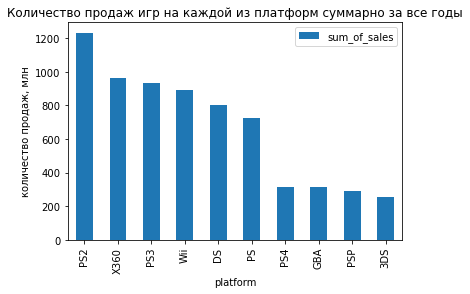

In [22]:
(
    total_sales_for_each_platform.groupby('platform')['sum_of_sales'].sum().reset_index()\
    .sort_values(by='sum_of_sales', ascending=False)\
    .head(10)\
    .plot.bar(x='platform', y='sum_of_sales', rot=90)
)

plt.title('Количество продаж игр на каждой из платформ суммарно за все годы')
plt.ylabel('количество продаж, млн')
plt.show()

По графику распределения чётко выделяются платформы с наибольшими продажами:
* PS2
* X360
* PS3
* Wii
* DS
* PS

Построим распределение по годам для каждой из платформ с наибольшими суммарными продажами.

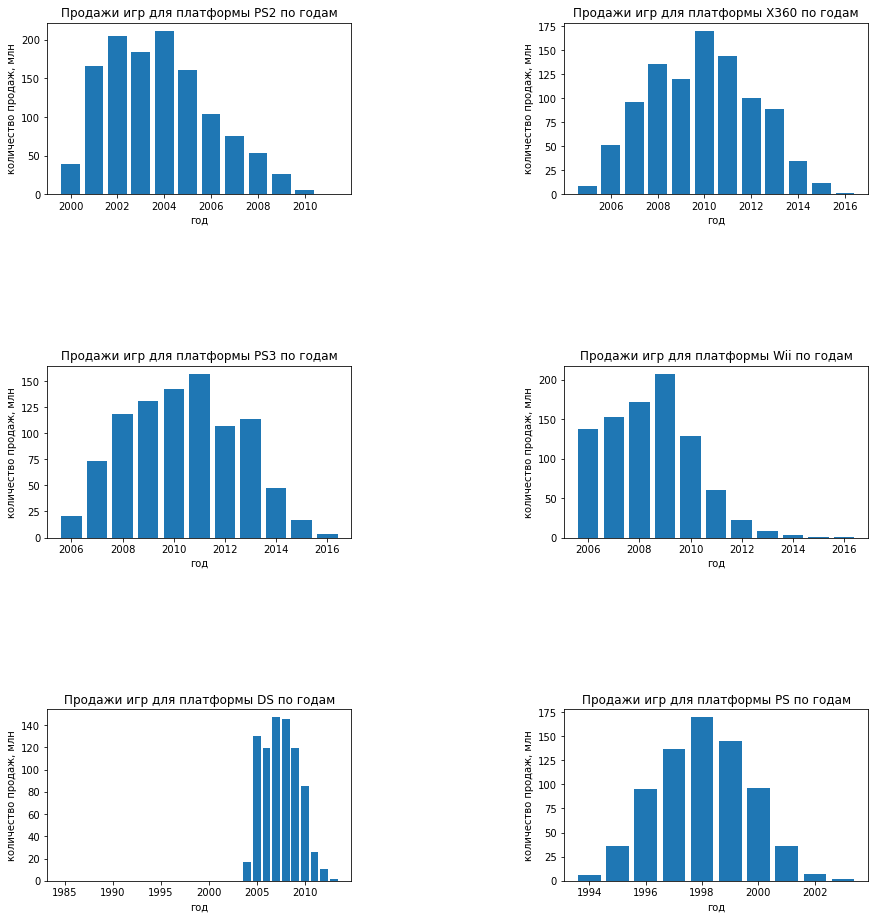

In [23]:
top = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

i = 1
for name in top:
    
    a = total_sales_for_each_platform.query('platform == @name')
    plt.subplot(3, 2, i)  
    plt.bar(a['year_of_release'], a['sum_of_sales'])
    i+=1
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.02, 
                    right=2, 
                    top=3, 
                    wspace=0.7, 
                    hspace=1)
    plt.title(f'Продажи игр для платформы {name} по годам')
    plt.xlabel('год')
    plt.ylabel('количество продаж, млн')
    
 
plt.show()  


* Игры для PS с 2003 года либо больше не выпускаются, либо не продаются. Эти данные не помогут при прогнозировании продаж на 2017 год.<br>
* Игры для PS2 резко упали в продаже с 2006 года. С 2012 года вообще не продаются. Эти данные не помогут при прогнозировании продаж на 2017 год.<br>
* Игры на PS3 падают в продаже с 2014 года. На момент 2016 года игры все еще продаются, но совсем в небольшом количестве (3,6 млн проданных копий по всему миру). Будем использовать данные по продажам игр на PS3 с 2012 по 2016 годы.
* Продажи игр на платформах Wii и X360 с 2011 года падают. В 2016 году для Wii было продано по всему миру 0,18 млн копий, а для X360 1.52 млн копий. Это очень мало. В связи с тем, что у нас нет больше данных по другим платформам, будем работать с тем, что есть. Будем использовать данные о продажах игр на Wii и X360 на с 2012 по 2016 годы для планирования продаж на 2017 год.
* Активные продажи игр для платформы DS проходили с 2005 по 2010 года. Эти данные не помогут построить прогноз продаж игр на DS на 2017 год, потому что с 2012 года количество продаж на этой платформе резко сократилось. После 2013 года информации о продажах нет вовсе. Либо платформу перестали выпускать, либо игры больше не выпускались. Эти данные не помогут при планировании продаж игр на 2017 год.

### Анализ продаж на платформах за 2014-2016 гг

Для целей прогнозирования продаж на следующий год, выберем данные по всем платформам за 2014 - 2016 годы.

In [24]:
actual_year = 2014
sales_2014_2016 = total_sales_for_each_platform.query('year_of_release >= @actual_year')
sales_2014_2016

,platform,year_of_release,sum_of_sales,mean_of_sales,median_of_sales,count_of_sales
15,3DS,"2,014.00",43.76,0.55,0.09,80
16,3DS,"2,015.00",27.78,0.32,0.09,86
17,3DS,"2,016.00",15.14,0.33,0.08,46
116,PC,"2,014.00",13.28,0.28,0.10,47
117,PC,"2,015.00",8.52,0.17,0.08,50
118,PC,"2,016.00",5.25,0.10,0.04,54
150,PS3,"2,014.00",47.76,0.44,0.16,108
151,PS3,"2,015.00",16.82,0.23,0.05,73
152,PS3,"2,016.00",3.60,0.09,0.07,38
154,PS4,"2,014.00",100.00,1.33,0.60,75


Как объяснялось ранее, данные по продажам игры на DS не будем учитывать (с 2014 года игры на эту платформу не продаются).

Найдем распределение продаж на эти платформы. Для этого построим график.

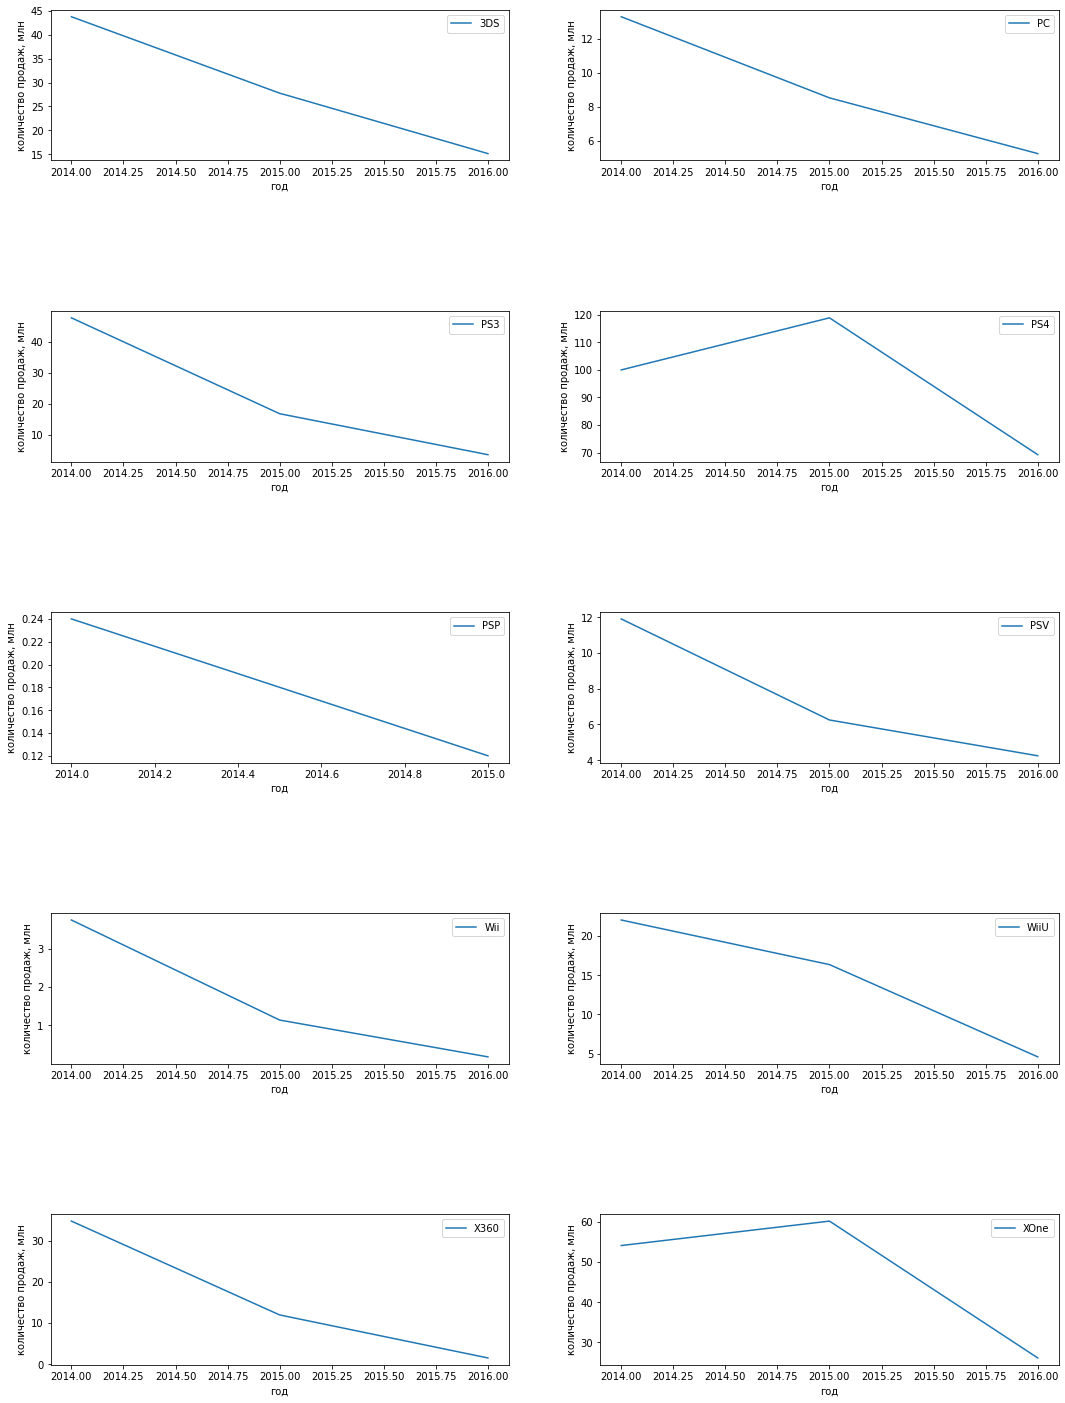

In [25]:
top_platforms = sales_2014_2016['platform'].unique()

plt.figure(figsize=(10, 10))


i = 1
for platform in top_platforms:
    slice = sales_2014_2016.query('platform == @platform')
    plt.subplot(6, 2, i)
    plt.plot(slice['year_of_release'], slice['sum_of_sales'], linestyle='-', label=platform)
    i+=1
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=1.5, 
                    top=2.5, 
                    wspace=0.2, 
                    hspace=1)
    
    plt.xlabel('год')
    plt.ylabel('количество продаж, млн')
    plt.legend()


plt.show()

- С 2014 по 2016 год продажи игр на всех платформах падают.
- В 2016 году лидирует по продажам игры на платформе PS4. На втором месте продажи игр на платформу XOne. На третьем месте продажи игр на платформу 3DS.
- Продажи игр на PC и PS3 c 2014 по 2016 годы далеки от нуля.
- Самые низкие показатели по продажам у платформ Wii, X360.
- Продажи по всем остальным платформам крайне малы.

Построим график «ящик с усами» по глобальным продажам игр для перспективных платформ: PS4, XOne, 3DS и PC

In [26]:
#making array with names of perspective platforms
names_of_perspective_platforms = ['PS4', 'XOne', '3DS', 'PC', 'PS3']

#selecting perspective platforms
perspective_platforms = sales_2014_2016.query('platform == @names_of_perspective_platforms')

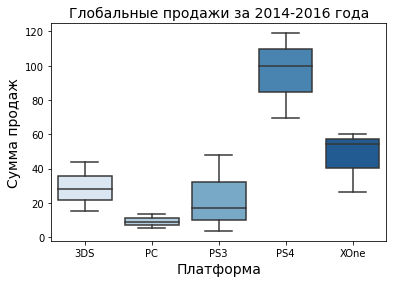

In [27]:
boxplot = sns.boxplot(x=perspective_platforms['platform'], 
            y=perspective_platforms['sum_of_sales'], 
            data=perspective_platforms,
            palette="Blues")
boxplot.axes.set_title("Глобальные продажи за 2014-2016 года", fontsize=14)
boxplot.set_xlabel("Платформа", fontsize=14)
boxplot.set_ylabel("Сумма продаж", fontsize=14)
plt.show()

In [28]:
perspective_platforms

,platform,year_of_release,sum_of_sales,mean_of_sales,median_of_sales,count_of_sales
15,3DS,"2,014.00",43.76,0.55,0.09,80
16,3DS,"2,015.00",27.78,0.32,0.09,86
17,3DS,"2,016.00",15.14,0.33,0.08,46
116,PC,"2,014.00",13.28,0.28,0.10,47
117,PC,"2,015.00",8.52,0.17,0.08,50
118,PC,"2,016.00",5.25,0.10,0.04,54
150,PS3,"2,014.00",47.76,0.44,0.16,108
151,PS3,"2,015.00",16.82,0.23,0.05,73
152,PS3,"2,016.00",3.60,0.09,0.07,38
154,PS4,"2,014.00",100.00,1.33,0.60,75


Для платформы **3DS**
Медианное значение глобальных продаж игр составляет около 44 млн. копий<br>
Минимальное значение суммарных продаж около 15, максимальное значение суммарных продаж около 57 млн. копий <br>
Межквартильный размах от 29 до 51 млн копий.<br>

Для платформы **PS4**
Медианное значение глобальных продаж игр составляет около 85 млн. копий<br>
Минимальное значение суммарных продаж около 19, максимальное значение суммарных продаж около 60 млн. копий <br>
Межквартильный размах от 60 до 107 млн копий.<br>

Для платформы **XOne**
Медианное значение глобальных продаж игр составляет около 41 млн.<br>
Минимальное значение суммарных продаж около 29, максимальное значение суммарных продаж около 118 млн. копий <br>
Межквартильный размах от 26 до 59 млн копий.<br>

Для платформы **PC**
Медианное значение глобальных продаж игр составляет около 13 млн.<br>
Минимальное значение суммарных продаж около 5, максимальное значение суммарных продаж около 13 млн. копий <br>
Межквартильный размах от 10 до 13 млн копий. <br>
Имеется выброс, составляющий около 23 млн. Такие продажи наблюдались в 2012 году.

Для платформы платформы **PS3**
Межквартильный размах от 8 до 30 млн копий. Медианное значние глобавльных продаж игр составляет около 17 млн копий. Минимальное значение суммы продаж 4 млн копий, максимальное значение суммарных продаж 50 млн копий

### Анализ взаимосвязи продаж и оценок критиков и пользователей

Посмотрим, как влияют на продажи отзывы пользователей и критиков.

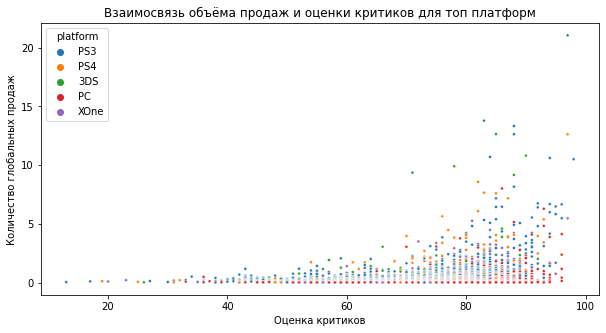

In [29]:
plt.figure(figsize = (10,5))

ax = sns.scatterplot(x='critic_score', 
                y='total_sales_worldwide', 
                data=games.query('platform == @names_of_perspective_platforms'),
                hue='platform', marker=".")
ax.set(title = 'Взаимосвязь объёма продаж и оценки критиков для топ платформ')
ax.set_xlabel("Оценка критиков")
ax.set_ylabel("Количество глобальных продаж")
plt.show()

По графику не видно вообще корреляции между оценкой критиков и суммами продаж. Поэтому считать коэффициент корреляции Пирсона бессмысленно.

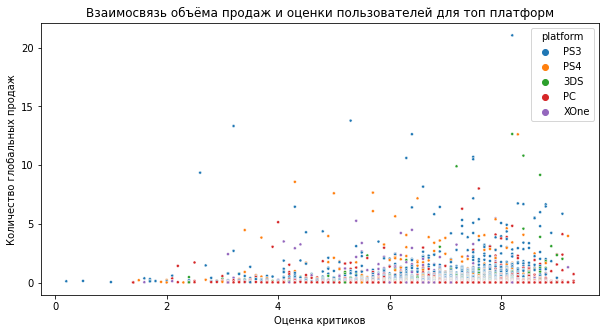

In [30]:
plt.figure(figsize = (10,5))

ax = sns.scatterplot(x='user_score', 
                y='total_sales_worldwide', 
                data=games.query('platform == @names_of_perspective_platforms'),
                hue='platform', marker=".")
ax.set(title = 'Взаимосвязь объёма продаж и оценки пользователей для топ платформ')
ax.set_xlabel("Оценка критиков")
ax.set_ylabel("Количество глобальных продаж")
plt.show()

Мы не наблюдаем чёткой корреляции между оценкой пользователей и объемами продаж игр на топ платформы

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам.

In [31]:
platform_genre_sales = games.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='total_sales_worldwide', 
                        aggfunc=sum).fillna(0).applymap(float)


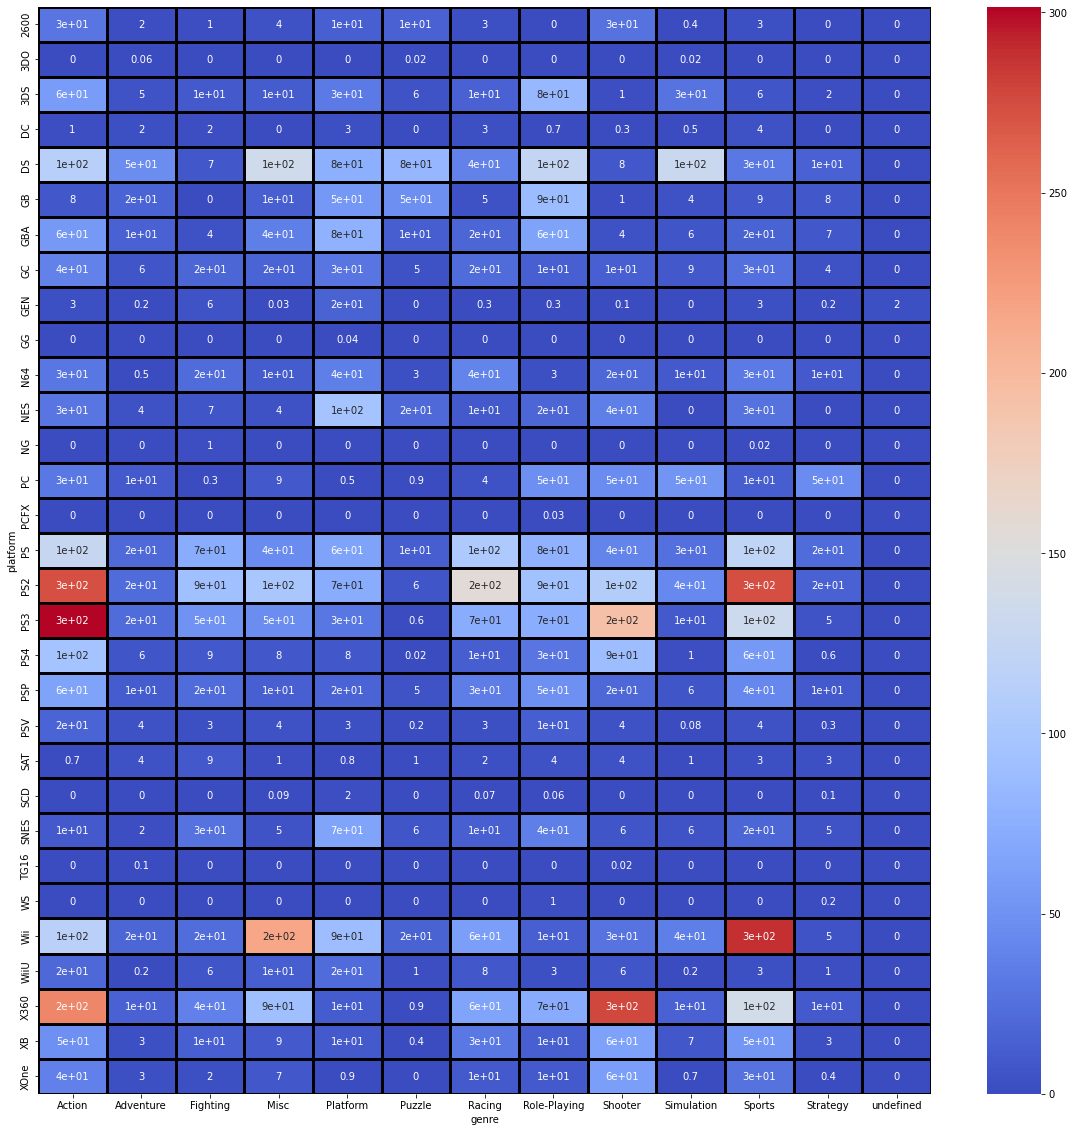

In [32]:
plt.figure(figsize=(20, 20))
sns.heatmap(platform_genre_sales, annot=True,  fmt ='.1g', cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

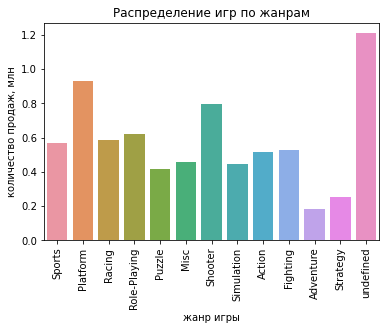

In [33]:
sns.barplot(x="genre", y="total_sales_worldwide", data=games, ci=None)
plt.title('Распределение игр по жанрам')
plt.xlabel('жанр игры')
plt.ylabel('количество продаж, млн')
plt.xticks(rotation=90)
plt.show()

* Самые прибыльные жанры игр Platform, Shooter, undefined. Undefined - это данные по двум играм, для которых в исходных данных не было данных о жанре игры.<br>
* Самые низкие продажи игр жанра Adventure, Strategy.

Посмотрим на распределение продаж по перспективным платформам.

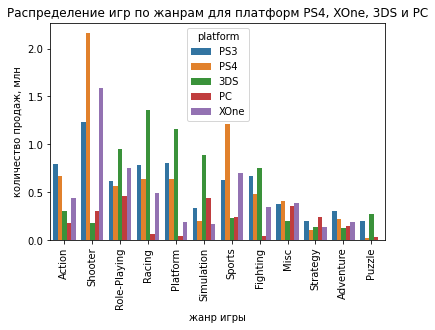

In [34]:
perspective_platforms = games.query('platform == @names_of_perspective_platforms')

sns.barplot(x="genre", 
            y="total_sales_worldwide", 
            data=perspective_platforms, 
            ci=None, 
            hue='platform')


plt.title('Распределение игр по жанрам для платформ PS4, XOne, 3DS и PC')
plt.xlabel('жанр игры')
plt.ylabel('количество продаж, млн')
plt.xticks(rotation=90)
plt.show()

* Для платформы PS4 самые прибыльные жанры игры Shooter и Sports. Самый неприбыльный жанр игры Puzzle и Strategy<br>
* Для платформы 3DS самые прибыльные жанры игры Racing и Platform. Самый неприбыльный жанр игры Adventure и Strategy<br>
* Для платформы XOne самый прибыльный жанр игры Shooter. Самый неприбыльный жанр игры Puzzle, Strategy, Simulation, Platform, Adventure.<br>
* Для платформы PC самый прибыльный жанр игры Role-Playing и Simulation. Самый неприбыльный жанр игры Platform, Fighting, Puzzle.<br>
* Для платформы PS3 cамый прибыльный жанр игры shooter. Cамый неприбыльный жанр игры Strategy.

### Вывод

- С 1980 по 2016 год количество выпускаемых игр на платформы увеличилось<br>
- За все годы больше всего продаж игр на платформы DS, PS, PS2, PS3, Wii, X360<br>
- С 2013 по 2016 год самые высокие продажи игр на платформы PS4, XOne, 3DS, PC. Но с 2015 года продажи игр на все платформы падают <br>
- Самые большие продажи игр с 2013 по 2016 год на платформе PS4 - медианное значение 85 млн копий<br>
- Оценки критиков и пользоватлей никак не влияют на объемы продаж игр <br>
- Самыми популярными и продаваемыми жанрами игр являются shooter (для PS4 и XOne), racing (для 3DS) и role-playing (для PC).

## Описание портретов пользователей каждого региона

### Нахождение самых популярных платформ

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5) за всё время выпуска игр.

In [35]:
popular_platforms_for_regions = games.pivot_table(index='platform', 
                                      aggfunc = 'sum', 
                                      values = ['na_sales', 'eu_sales', 'jp_sales'])

popular_platforms_for_regions.columns = ['total_sales_eu', 'total_sales_jp', 'total_sales_na']
popular_platforms_for_regions.reset_index(inplace=True)

popular_platforms_for_regions['ratio_eu'] = (popular_platforms_for_regions['total_sales_eu'] *100 / popular_platforms_for_regions['total_sales_eu'].sum())

#finding top 5 platforms for eu region
top_platforms_for_eu = popular_platforms_for_regions[['platform', 'total_sales_eu', 'ratio_eu']].sort_values(by='total_sales_eu', ascending = False).head(5)
                                             

In [36]:
top_platforms_for_eu

,platform,total_sales_eu,ratio_eu
16,PS2,339.29,13.99
17,PS3,330.29,13.62
28,X360,270.76,11.17
26,Wii,262.21,10.81
15,PS,213.61,8.81


Построим круговую диаграмму

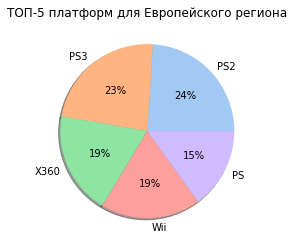

In [37]:
colors = sns.color_palette('pastel')
plt.title('ТОП-5 платформ для Европейского региона')
plt.pie(top_platforms_for_eu['ratio_eu'], 
        labels = top_platforms_for_eu['platform'],
        colors=colors, 
        autopct='%.0f%%', 
        shadow = True)

plt.show()

In [38]:
popular_platforms_for_regions['ratio_jp'] = (popular_platforms_for_regions['total_sales_jp'] *100 / popular_platforms_for_regions['total_sales_jp'].sum())

#finding top 5 platforms for jp region
top_platforms_for_jp = popular_platforms_for_regions[['platform', 'total_sales_jp', 'ratio_jp']].sort_values(by='total_sales_jp', ascending = False).head(5)
top_platforms_for_jp                                          

,platform,total_sales_jp,ratio_jp
4,DS,175.57,13.53
15,PS,139.82,10.78
16,PS2,139.20,10.73
23,SNES,116.55,8.98
2,3DS,100.67,7.76


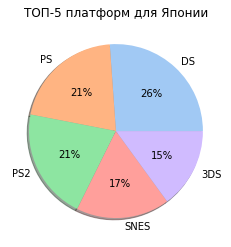

In [39]:
colors = sns.color_palette('pastel')
plt.title('ТОП-5 платформ для Японии')
plt.pie(top_platforms_for_jp['ratio_jp'], 
        labels = top_platforms_for_jp['platform'],
        colors=colors, 
        autopct='%.0f%%', 
        shadow = True)

plt.show()

In [40]:
popular_platforms_for_regions['ratio_na'] = (popular_platforms_for_regions['total_sales_na'] *100 / popular_platforms_for_regions['total_sales_na'].sum())

#finding top 5 platforms for jp region
top_platforms_for_na = popular_platforms_for_regions[['platform', 'total_sales_na', 'ratio_na']].sort_values(by='total_sales_na', ascending = False).head(5)
top_platforms_for_na     

,platform,total_sales_na,ratio_na
28,X360,602.47,13.69
16,PS2,583.84,13.26
26,Wii,496.90,11.29
17,PS3,393.49,8.94
4,DS,382.40,8.69


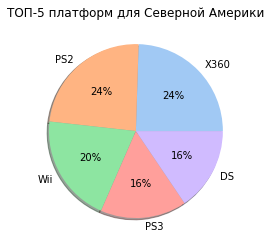

In [41]:
colors = sns.color_palette('pastel')
plt.title('ТОП-5 платформ для Северной Америки')
plt.pie(top_platforms_for_na['ratio_na'], 
        labels = top_platforms_for_na['platform'],
        colors=colors, 
        autopct='%.0f%%', 
        shadow = True)

plt.show()

- Топ-5 популярных (c наибольшими продажами игр) платформ для Европейского региона в порядке убывания PS2, PS3, X360, Wii, PS. <br>
- Топ-5 популярных (c наибольшими продажами игр)  платформ для Японии  в порядке убывания DS, PS, PS2, SNES, 3DS. <br>
- Топ-5 популярных (c наибольшими продажами игр)  платформ для Северной Америки в порядке убывания X360, PS2, Wii, PS3, DS <br>
- Самые высокие доли продаж от общего количества проданных игр для Европейского региона: PS2 (14%), PS3 (13.6%), X360(11%), Wii (10.8%), PS (8.8%) <br>
- Самые высокие доли продаж от общего количества проданных игр для Японии: DS (13.5%), PS (10.8%), PS2 (10.7%), SNES (9%), 3DS (7.8%) <br>
- Самые высокие доли продаж от общего количества проданных игр для Северной Америки: X360 (13.7%), PS2 (13.3%), Wii (11.3%), PS3 (8.9%), DS (8.7%). <br>
Во всех трёх регионах популярной является платформа PS2. Доля продаж игр на платформы PS2 от суммарных продаж за все годы на все остальные платформы для Европы, Японии и Северной Америки составляют соответствено: 14%, 10.7% и 13.3% 

### Нахождение самых популярных жанров игр

Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры игр (топ-5) за всё время выпуска игр.

In [42]:
popular_genres = games.pivot_table(index='genre', 
                                      aggfunc = 'sum', 
                                      values = ['na_sales', 'eu_sales', 'jp_sales'])
popular_genres.columns = ['total_sales_eu', 'total_sales_jp', 'total_sales_na']
popular_genres.reset_index(inplace=True)

#finding top 5 platforms for eu region
popular_genres_eu = popular_genres.sort_values(by='total_sales_eu', ascending = False).head(5)
popular_genres_eu

,genre,total_sales_eu,total_sales_jp,total_sales_na
0,Action,519.13,161.43,879.01
10,Sports,376.79,135.54,684.43
8,Shooter,317.34,38.76,592.24
6,Racing,236.51,56.71,359.35
3,Misc,212.74,108.11,407.27


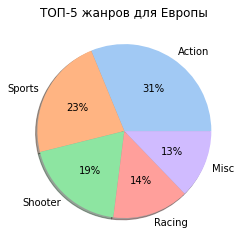

In [43]:
colors = sns.color_palette("pastel")
plt.title('ТОП-5 жанров для Европы')
plt.pie(popular_genres_eu['total_sales_eu'], labels =popular_genres_eu['genre'],colors=colors, autopct='%.0f%%', shadow = True)
plt.show()

In [44]:
#finding top 5 platforms for Japan region
popular_genres_jp = popular_genres.sort_values(by='total_sales_jp', ascending = False).head(5)
popular_genres_jp 

,genre,total_sales_eu,total_sales_jp,total_sales_na
7,Role-Playing,188.71,355.41,330.81
0,Action,519.13,161.43,879.01
10,Sports,376.79,135.54,684.43
4,Platform,200.35,130.83,445.50
3,Misc,212.74,108.11,407.27


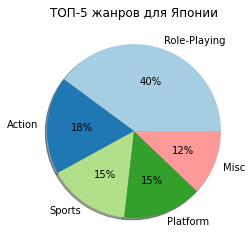

In [45]:
colors = sns.color_palette("Paired")
plt.title('ТОП-5 жанров для Японии')
plt.pie(popular_genres_jp ['total_sales_jp'], labels = popular_genres_jp ['genre'],colors=colors, autopct='%.0f%%', shadow = True)
plt.show()

In [46]:
#finding top 5 platforms for Northern America region
popular_genres_na = popular_genres.sort_values(by='total_sales_na', ascending = False).head(5)
popular_genres_na

,genre,total_sales_eu,total_sales_jp,total_sales_na
0,Action,519.13,161.43,879.01
10,Sports,376.79,135.54,684.43
8,Shooter,317.34,38.76,592.24
4,Platform,200.35,130.83,445.50
3,Misc,212.74,108.11,407.27


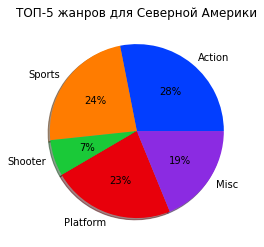

In [47]:
colors = sns.color_palette("bright")
plt.title('ТОП-5 жанров для Северной Америки')
plt.pie(popular_genres_na ['total_sales_jp'], labels = popular_genres_na ['genre'],colors=colors, autopct='%.0f%%', shadow = True)
plt.show()

Топ-5 популярных (c наибольшими продажами игр) жанров игр для Европейского региона в порядке убывания Action, Sports, Shooter, Racing, Misc. <br>
Топ-5 популярных (c наибольшими продажами игр) жанров игр для Японии в порядке убывания Role-Playing, Action, Sports, Platform, Misc.<br>
Топ-5 популярных (c наибольшими продажами игр) жанров игр для Северной Америки в порядке убывания Action, Sports, Shooter, Platform, Misc.<br>
Для всех трёх регионов популярны игры жанра Action, Sports, Misc.<br>
Разница в популярности жанров может быть объяснена разницей доступности и популярности платформ. Для каждой платформы выпускаются свои игры, поэтому если в Японии больше всего распространены платформа DS, то значит на эту платформу скорее всего выпускалось много игр жанра Role-Playing.

### Влияние рейтинга ESRP на продажи

Посмотрим, влияет ли рейтинг ESRP на продажи в каждом из регионов (NA, EU, JP) 

In [48]:
#creating pivot table, groped by names of rating and sales in Europe, Japanese and Northern America regions
esrp_sales = games.pivot_table(index='rating', 
                               aggfunc = 'sum', 
                               values = ['na_sales', 'eu_sales', 'jp_sales'])
esrp_sales.reset_index(inplace=True)
esrp_sales.columns = ['rating', 'eu_sales', 'jp_sales', 'na_sales']
esrp_sales

,rating,eu_sales,jp_sales,na_sales
0,AO,0.61,0.00,1.26
1,E,710.52,199.57,"1,295.55"
2,E10+,188.52,40.20,353.32
3,EC,0.11,0.00,1.53
4,M,483.97,64.24,748.48
5,ND,613.83,841.96,"1,242.46"
6,RP,0.08,0.00,0.00
7,T,427.03,151.40,759.75


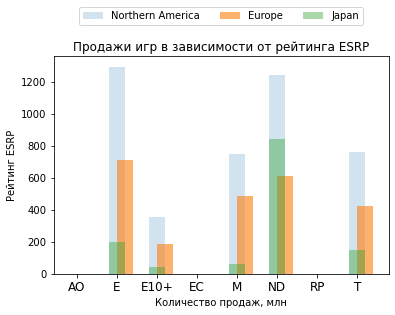

In [49]:
plt.bar(esrp_sales['rating'], esrp_sales['na_sales'], width = 0.4, label='Northern America', alpha=0.2)
plt.bar(esrp_sales['rating'], esrp_sales['eu_sales'], width = 0.4, label='Europe', align = 'edge', alpha=0.6)
plt.bar(esrp_sales['rating'], esrp_sales['jp_sales'], width = 0.4, label='Japan', align = 'center', alpha=0.4)

plt.title('Продажи игр в зависимости от рейтинга ESRP')
plt.xlabel('Количество продаж, млн')
plt.ylabel('Рейтинг ESRP')
plt.xticks(fontsize=12)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=3)
plt.show()

* В Европе и Северной Америке лидируют по продажам игры с рейтингом «E» («Everyone») — «Для всех».
* В Японии лидируют по продажам игры с рейтингом ND - Not Defined.
* Меньше всего продаж игр во всех регионах с рейтингом «RP» («Rating Pending») — «Рейтинг ожидается» (видно из вышеприведенной сводной таблицы esrp_sales).

### Вывод

* Портрет пользователя из Европы, который покупает больше всего игр: любит платформу PS2, жанр игры  Action, рейтинг игры «E» («Everyone»)<br>
* Портрет пользователя из Японии, который покупает больше всего игр: любит платформу DS, жанр игры  Role-Playing, рейтинг ND, Not Defined. <br>
* Портрет пользователя из Северной Америки, который покупает больше всего игр: любит платформу X360, жанр игры  Action, рейтинг игры «E» («Everyone»)

## Проверка гипотезы

### Двусторонняя проверка: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые за 2012-2016 годы

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги платформ Xbox One и PC одинаковые}\\
   H_1 :\text{Средние пользовательские рейтинги платформ Xbox One и PC отличаются}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем p-value.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [50]:
alpha = .05

Сделаем срез по данным: выберем платформы XBox и PC, релизы игр на которые проходили с 2014 года

In [51]:
actual_year = 2014
#selecting games for pc
pc_games_actual_years = games.query('year_of_release >= @actual_year & platform == "PC"')
#selecting games for xone
xone_games_actual_years = games.query('year_of_release >= @actual_year & platform == "XOne"')

Проверим данные на нормальность распределения

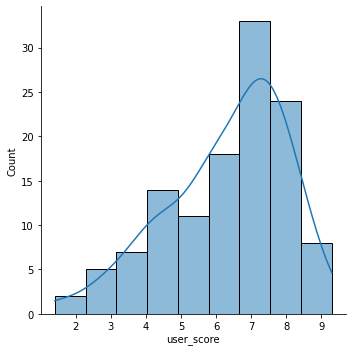

In [52]:
sns.displot(data = pc_games_actual_years, x = "user_score", kde=True)
plt.show()

Распределение данных больше похоже на гипергеометрическое распределение.

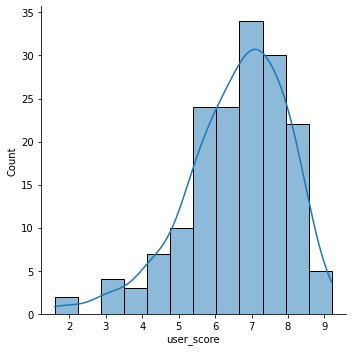

In [53]:
sns.displot(data=xone_games_actual_years, x = "user_score",kde=True)
plt.show()

Распределение данных нельяз назвать нормальным.

Для проверки гипотез воспользуемся непараметрическим тестом Манна-Уитни

Перед эти мы удалим все строчки с NaNами 

In [54]:
#deleting NaNs from data
pc_games_actual_years = pc_games_actual_years.dropna(subset=['user_score'])
xone_games_actual_years = xone_games_actual_years.dropna(subset=['user_score'])

results = st.mannwhitneyu(pc_games_actual_years['user_score'], xone_games_actual_years['user_score'], alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.27752869727762175
Не получилось отвергнуть нулевую гипотезу


Получается, что p-value = 0,28. Мы практически с 30%-ой вероятностью можем утверждать, что для данной конкретной выборки средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Двусторонняя проверка: Средние пользовательские рейтинги жанра Action и Sports разные

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги жанра Action и Sports одинаковые}\\
   H_1 :\text{Средние пользовательские рейтинги жанра Action и Sports отличаются}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем p-value.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

Сделаем срез по данным: выберем жанры Action и Sports, релизы игр на которые проходили с 2012 года.

In [55]:
sports_games_actual_years = games.query('year_of_release >= @actual_year & genre == "Sports"')
action_games_actual_years = games.query('year_of_release >= @actual_year & genre == "Action"')

Проверим данные на нормальность распределения

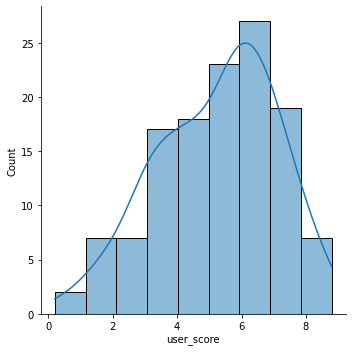

In [56]:
sns.displot(data=sports_games_actual_years, x = "user_score",kde=True)

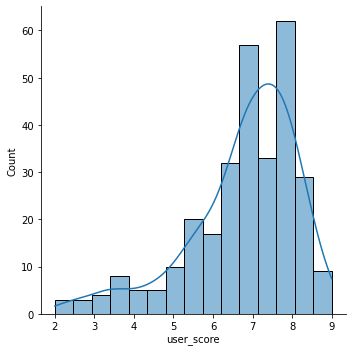

In [57]:
sns.displot(data=action_games_actual_years, x = "user_score",kde=True)

Данные по оценкам пользователей для обоих жанров не распределены нормально.

Для проверки гипотез воспользуемся непараметрическим тестом Манна-Уитни

In [58]:
sports_games_actual_years = sports_games_actual_years .dropna(subset=['user_score'])
action_games_actual_years = action_games_actual_years.dropna(subset=['user_score'])

results = st.mannwhitneyu(sports_games_actual_years ['user_score'], 
                          action_games_actual_years['user_score'], 
                          alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.2166879280294303e-16
Отвергаем нулевую гипотезу


Вероятность попасть в выбивающиеся значения близка к нулю. значит мы отвергаем нулевую гипотезу. Вывод: средние пользовательские рейтинги жанра Action и Sports отличаются

Посчитаем средние значения пользовательских значений для жанра Sports и Action.

In [59]:
action_games_actual_years['user_score'].mean() / sports_games_actual_years['user_score'].mean()

1.2938471514420877

Средние пользовательские оценки жанра Action выше, чем жанра Sports в 1,29 раза

### Вывод

В результате проверки гипотез было выяснено, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а редние пользовательские рейтинги жанра Action и Sports отличаются в сторону Action (то есть пользователи данра Action ставят оценки играм выше).

## Общий вывод

* В исходных данных представлена информация об играх с годом релиза 1980 по 2016. <br>
* Макcимальные продажи всех игр для всех платформ за все годы для Северной Америки 41,4 млн копий, для Европы 29 млн копий, для Японии 10,2 млн копий, для остальных регионов 10,6 млн копий. Больше всего продаж в Северной Америке.<br>
* В исходных данных есть пропуски в годах релиза игры. Это сильно мешает анализу. Необходимо сделать перевыгрузку даннаых дата-инженерами для более подробного и качественного анализа.<br>
* В исходных данных есть пропуски в стобце международного рейтинга. Эти пропуски сильно влияют на выводы о влиянии рейтинга на продажи игр. Такие пропуски были заменены на фиктивное значение. <br>
* С 1980 по 2016 год количество выпускаемых игр увеличивается. На какие-то платформы игры перестают выпускаться.<br>
* За все представленные годы больше всего продаж игр на платформы DS, PS, PS2, PS3, Wii, X360.<br>
    * Игры на платформе DS с 2005 по 2010 годы находятся на пике продаж.<br>
    * Игры на платформе PS с 1996 по 2000 годы находятся на пике продаж.<br>
    * Игры на платформе PS2 с 2001 по 2005 годы находятся на пике продаж.<br>
    * Игры на платформе PS3 с 2008 по 2013 годы находятся на пике продаж.<br>
    * Игры на платформе Wii с 2006 по 2009 годы находятся на пике продаж.<br>
    * Игры на платформе X360 с 2007 по 2013 годы находятся на пике продаж.<br>
* С 2014 по 2016 годы самые высокие продажи игр на платформы PS4, XOne, 3DS, PC и PS3. С 2015 года продажи игр на все платформы падают. Это возможно связано с каким-то мировым кризисом, либо с высокой мощностью компьютеров. Возможно, новые процессоры и видеокарты с компьютерах с 2015 года настолько мощны, что стали заменять людям платформы. При этом на компьютеры выпускаются онлайн игры, что очень сильно привлекает пользователей. Игры на компьютер дешевле, чем на платформы. Поэтому объем продаж на платформы возможно связан с конкуренцией со стороны компьютеров.<br>
* Медианные значения продаж с 2014 по 2016 годы для платформы 3DS 44 млн копий, для плафтормы PS4 85 млн копий, для платформы XOne 41 млн копий, для платформы PC 13 млн копий, для платформы PS3 17 млн копий. <br>
* Самые продаваемые игры на платформу PS4.<br>
*   Исследование показало, что оценки пользователей и критиков никак не влияют на объемы продаж игр.<br>
* За весь период (с 1980 по 2016 годы) самыми прибыльными являются жанры игр Platform и Shooter.
    * Для перспективных платформ 3DS самым популярным жанром является racing, 
    * для плафтормы PC role-playing
    * для PS4, PS3 и Xone - shooter.<br>
Возможно на такие высокие показатели продаж влияют эксклюзивные игры, которые выходят только для определенной платформы.<br>
* За все время продаж игр для Северной Америки, Японии и Европы самые популярны игры жанра Action, Sports, Misc.<br>
* Портрет пользователя из Европы, который покупает больше всего игр: любит платформу PS2, жанр игры Action, рейтинг игры «E» («Everyone»)
* Портрет пользователя из Японии, который покупает больше всего игр: любит платформу DS, жанр игры Role-Playing, рейтинг игры Not Determined.
* Портрет пользователя из Северной Америки, который покупает больше всего игр: любит платформу X360, жанр игры Action, рейтинг игры «E» («Everyone»)<br>
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанра Action и Sports отличаются в сторону Action (то есть пользователи данра Action ставят оценки играм выше).